In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)

In [2]:
train_data = pd.read_csv("temp_train.csv", index_col='date', parse_dates=True)
train_data.head()

,temp,temp_c
date,,
1979-01-01,-119,-11.9
1979-01-02,-93,-9.3
1979-01-03,-78,-7.8
1979-01-04,-96,-9.6
1979-01-05,-99,-9.9


In [3]:
# create timestep
train_data['timestep'] = list(range(train_data.shape[0]))

train_data.head()

,temp,temp_c,timestep
date,,,
1979-01-01,-119,-11.9,0
1979-01-02,-93,-9.3,1
1979-01-03,-78,-7.8,2
1979-01-04,-96,-9.6,3
1979-01-05,-99,-9.9,4


<AxesSubplot:xlabel='date'>

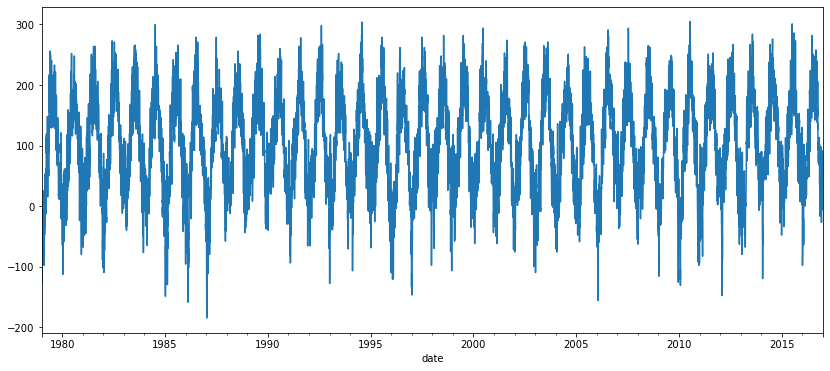

In [4]:
train_data['temp'].plot()

<AxesSubplot:xlabel='date'>

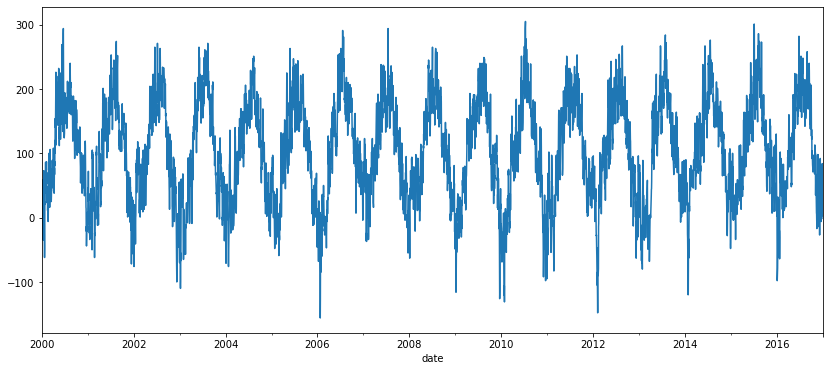

In [5]:
subset_data = train_data.loc['2000':'2016']
subset_data['temp'].plot()

<AxesSubplot:xlabel='date'>

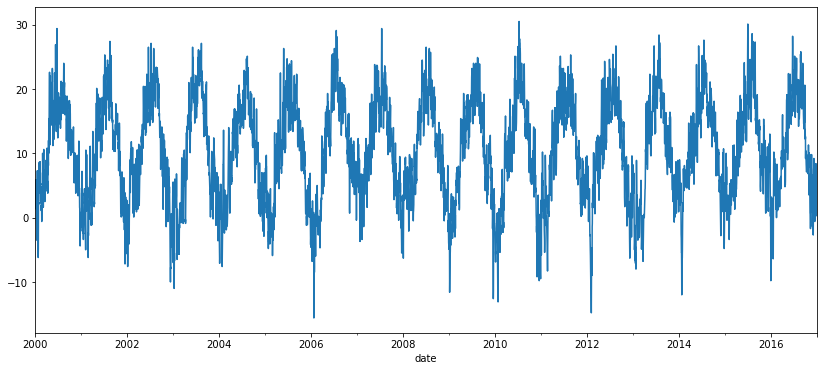

In [6]:
subset_data['temp_c'].plot()

In [7]:
X = train_data[['timestep']]
y = train_data['temp']

m_trend = LinearRegression()

m_trend.fit(X,y)

LinearRegression()

<AxesSubplot:xlabel='date'>

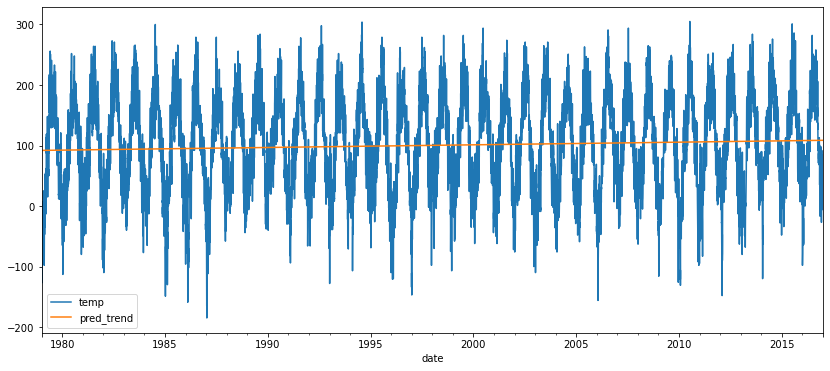

In [8]:
train_data['pred_trend'] = m_trend.predict(X)

train_data[['temp', 'pred_trend']].plot()

In [12]:
train_data['month'] = train_data.index.month
train_data['month'] = train_data['month'].astype(str)
train_data.head()

,temp,temp_c,timestep,pred_trend,month
date,,,,,
1979-01-01,-119,-11.9,0,91.939389,1
1979-01-02,-93,-9.3,1,91.940589,1
1979-01-03,-78,-7.8,2,91.941789,1
1979-01-04,-96,-9.6,3,91.942989,1
1979-01-05,-99,-9.9,4,91.944188,1


In [13]:
train_data.tail()

,temp,temp_c,timestep,pred_trend,month
date,,,,,
2016-12-27,63,6.3,13875,108.5878,12
2016-12-28,61,6.1,13876,108.5890,12
2016-12-29,41,4.1,13877,108.5902,12
2016-12-30,3,0.3,13878,108.5914,12
2016-12-31,8,0.8,13879,108.5926,12


In [14]:
train_data = pd.get_dummies(train_data, prefix='month', drop_first=True)

train_data.head()

,temp,temp_c,timestep,pred_trend,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
date,,,,,,,,,,,,,,,
1979-01-01,-119,-11.9,0,91.939389,0,0,0,0,0,0,0,0,0,0,0
1979-01-02,-93,-9.3,1,91.940589,0,0,0,0,0,0,0,0,0,0,0
1979-01-03,-78,-7.8,2,91.941789,0,0,0,0,0,0,0,0,0,0,0
1979-01-04,-96,-9.6,3,91.942989,0,0,0,0,0,0,0,0,0,0,0
1979-01-05,-99,-9.9,4,91.944188,0,0,0,0,0,0,0,0,0,0,0
